In [1]:
import numpy as np
import pandas as pd
import csv
import seaborn
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

abstract_narrative_understanding
Score Test:-0.02965614338903788
RMSE: 0.2682911001942481
MAPE: 68425607264576.69


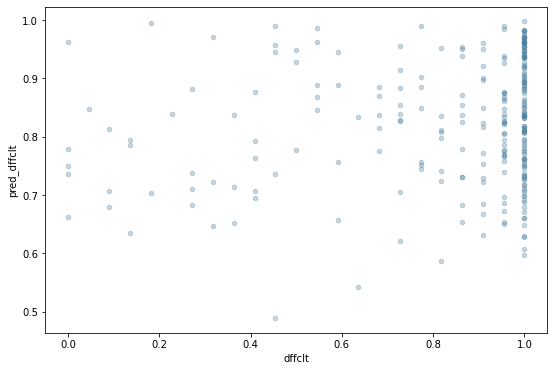

                    0
K            0.157367
FORCAST.RGL  0.149729
TTR          0.148072
Scrabble     0.141502
FOG          0.138666
Flesch       0.134670
SMOG         0.129994


epistemic_reasoning
Score Test:-0.020228313835743306
RMSE: 0.16431442680466826
MAPE: 0.3315872090532017


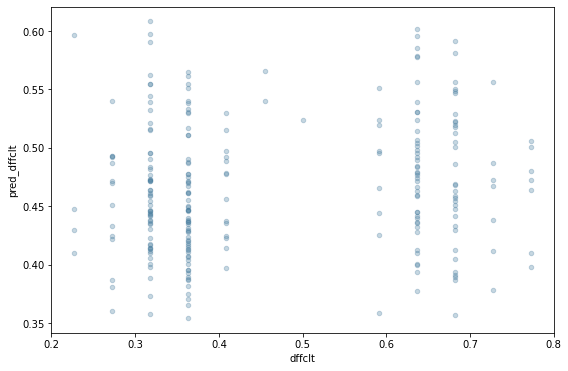

                    0
Scrabble     0.189364
TTR          0.170105
Flesch       0.159203
K            0.156744
FOG          0.136705
FORCAST.RGL  0.132553
SMOG         0.055326


formal_fallacies_syllogisms_negation
Score Test:-0.166256915495274
RMSE: 0.17180036649687552
MAPE: 0.3321503927595788


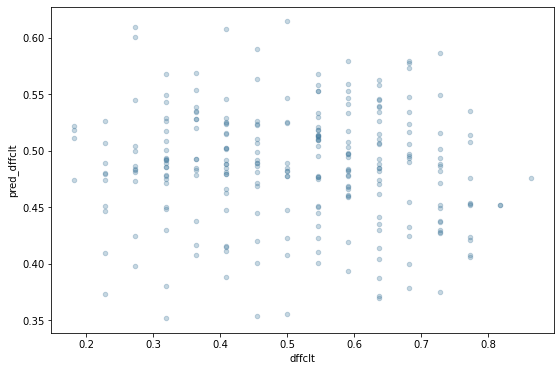

                    0
Scrabble     0.193070
TTR          0.169422
FORCAST.RGL  0.162472
K            0.150517
Flesch       0.124206
FOG          0.118479
SMOG         0.081833




In [3]:
tasks = ["mmlu_computer_security","mmlu_us_foreign_policy","mmlu_college_chemistry","lsat_qa","legal_support",
         "openbookqa","bbq","hellaswag","truthfulqa","mmlu_econometrics"]
bigbench = ["abstract_narrative_understanding","epistemic_reasoning","formal_fallacies_syllogisms_negation"]
RMSES = []
MAPES = []

# tasks = bigbench
for task in tasks:
    benchmark = "bigbench" #or helm
    data1 = pd.read_csv(f'./{benchmark}/{task}/LexicalDiversity_METRICS.csv',usecols= ["K","TTR"])
    data2 = pd.read_csv(f'./{benchmark}/{task}/LexicalReadability_METRICS.csv',usecols=["Flesch","Scrabble","FOG","SMOG","FORCAST.RGL"])
    data3 = pd.read_csv(f'./{benchmark}/{task}/{task}.csv',usecols=["instance_ID","correct"])

    data3= data3.groupby('instance_ID',as_index=False).mean()


    df = pd.concat([data1, data2,data3],axis=1,join="outer")
    df = df.set_index("instance_ID")

    df=df.rename(columns = {'correct':'Dffclt'})
    df["Dffclt"] = 1 - df["Dffclt"]

    #Prepare train and test data
    X = df.drop(['Dffclt'], axis = 1)
    y = df['Dffclt']
    training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .25, random_state = 42)


    clf=RandomForestRegressor()
    clf.fit(training, training_labels)

    preds = clf.predict(testing)

    print(task)
    print("Score Test:" + str(clf.score(testing,testing_labels)))
    rmse = mean_squared_error(testing_labels,preds,squared=False)
    print("RMSE: " + str(rmse))
    RMSES.append(rmse)
    mape = mean_absolute_percentage_error(testing_labels,preds)
    print("MAPE: " + str(mape))
    MAPES.append(mape)

    diff = pd.DataFrame(columns=['dffclt','pred_dffclt'])

    # assign the array to the column
    diff['pred_dffclt'] = preds
    diff['dffclt'] = testing_labels.to_numpy()

    diff.plot(kind='scatter', x='dffclt', y='pred_dffclt',figsize=(9,6),color='#457B9D',alpha=0.3)
#     plt.savefig(f'./{benchmark}/{task}/{task}_rf_readability_difficulty_notargets.pdf')
    plt.show()

    importance = pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)
#     importance.to_csv(f'./{benchmark}/{task}/rf_readability_difficulty_feature_importance.csv')
    print(importance)
    print("\n")


In [11]:
data2

,Flesch,FOG,FORCAST.RGL,Scrabble,SMOG
0,59.363637,12.632111,8.875844,1.657317,12.128229
1,58.789627,12.858322,8.875844,1.657317,12.299656
2,59.363637,12.632111,8.875844,1.646477,12.128229
3,51.255000,13.440476,9.636250,1.660124,12.724862
4,50.434306,13.777778,9.636250,1.661082,12.962598
...,...,...,...,...,...
1105,53.386663,13.203013,8.884308,1.644362,12.502719
1106,53.386663,13.203013,8.884308,1.649937,12.502719
1107,60.548335,12.993208,8.289909,1.696589,12.161745
1108,60.548335,12.993208,8.289909,1.701136,12.161745
